In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# cp1(서울시에서 1인가구가 살기 좋은 동네)

## 데이터 정제
- 데이터를 코랩에서 고친 후 태블로에서 시각화 진행

In [ ]:
#1인가구사유별
reason_one=pd.read_csv('/content/drive/MyDrive/cp1 1인가구/성별_연령별_1인가구사유별가구시도_20230105144338.csv',encoding = "CP949", engine='python')
reason_one

,시점,행정구역별,성별,연령별,1인가구-계,본인의 직장 때문에,본인의 학업 때문에,본인의 독립 생활을 위하여,본인의 건강 때문에,가족이 학업취업홍인건강등으로 타지에 거주하게 되어서,가족과 사별,기타
0,2020,전국,계,합계,6643354,2277582.0,328259.0,1739462.0,102862.0,1127873,1029789.0,37527.0
1,2020,전국,계,20세 미만,72119,11198.0,58203.0,NaN,NaN,2276,408.0,34.0
2,2020,전국,계,20~24,496119,169637.0,212989.0,85667.0,NaN,21442,5504.0,880.0
3,2020,전국,계,25~29,775110,494366.0,49934.0,189162.0,NaN,29628,9719.0,2301.0
4,2020,전국,계,30~34,618316,388892.0,5356.0,180804.0,1662.0,28792,10020.0,2790.0
...,...,...,...,...,...,...,...,...,...,...,...,...
187,2020,경기도,여자,65~69,53828,4074.0,NaN,13634.0,1148.0,17956,16737.0,279.0
188,2020,경기도,여자,70~74,48100,2061.0,NaN,9513.0,1078.0,15388,19895.0,165.0
189,2020,경기도,여자,75~79,45576,1276.0,NaN,5414.0,1273.0,14609,22801.0,203.0
190,2020,경기도,여자,80~84,35733,185.0,NaN,NaN,1046.0,14579,19844.0,79.0


In [ ]:
reason_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   시점                            192 non-null    int64  
 1   행정구역별                         192 non-null    object 
 2   성별                            192 non-null    object 
 3   연령별                           192 non-null    object 
 4   1인가구-계                        192 non-null    int64  
 5   본인의 직장 때문에                    180 non-null    float64
 6   본인의 학업 때문에                    124 non-null    float64
 7   본인의 독립 생활을 위하여                156 non-null    float64
 8   본인의 건강 때문에                    156 non-null    float64
 9   가족이 학업취업홍인건강등으로 타지에 거주하게 되어서  192 non-null    int64  
 10  가족과 사별                        191 non-null    float64
 11  기타                            186 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 18.1+ KB


In [ ]:
reason_one.fillna(0,inplace=True)

- 연령을 넓은 범위로 조정해줌

In [ ]:
age=[]
for i in reason_one['연령별']:
  if i =='합계':
    age.append('합계')
  elif i == '20세 미만'or i=='20~24':
    age.append('24세 이하')
  elif i == '25~29' or i == '30~34' or i=='35~39':
    age.append('25~39세')
  elif i == '40~44' or i == '45~49' or i =='50~54':
    age.append('40~54세')
  elif i == '55~59' or i =='60~64' or i=='65~69':
    age.append('55~69세')
  else:
    age.append('70세 이상')

In [ ]:
reason_one['연령구간']=age

In [ ]:
reason_one.to_csv('1인가구사유별 연령대.csv')

In [ ]:
#남자
reason_one.query("성별=='남자' and 행정구역별=='전국'")

,시점,행정구역별,성별,연령별,1인가구-계,본인의 직장 때문에,본인의 학업 때문에,본인의 독립 생활을 위하여,본인의 건강 때문에,가족이 학업취업홍인건강등으로 타지에 거주하게 되어서,가족과 사별,기타,연령구간
16,2020,전국,남자,합계,3304398,1437882.0,175375.0,960142.0,53446.0,389434,265211.0,22908.0,합계
17,2020,전국,남자,20세 미만,33854,5802.0,26782.0,0.0,0.0,1092,161.0,17.0,24세 이하
18,2020,전국,남자,20~24,219029,64115.0,105909.0,35675.0,0.0,10132,2735.0,463.0,24세 이하
19,2020,전국,남자,25~29,433190,271334.0,38218.0,100088.0,0.0,16139,5962.0,1449.0,25~39세
20,2020,전국,남자,30~34,394473,256851.0,3680.0,108065.0,958.0,16327,6613.0,1979.0,25~39세
21,2020,전국,남자,35~39,320100,182074.0,479.0,108009.0,1637.0,17596,8559.0,1746.0,25~39세
22,2020,전국,남자,40~44,272897,145296.0,163.0,94727.0,2828.0,17643,10081.0,2159.0,40~54세
23,2020,전국,남자,45~49,299310,146858.0,102.0,104252.0,4058.0,25940,15283.0,2817.0,40~54세
24,2020,전국,남자,50~54,300477,131404.0,31.0,104065.0,6193.0,36730,18578.0,3476.0,40~54세
25,2020,전국,남자,55~59,294220,108224.0,0.0,100679.0,8644.0,49610,23587.0,3476.0,55~69세


In [ ]:
# 서울시에서 범죄율이 높은 구?
crime=pd.read_csv('/content/drive/MyDrive/cp1 1인가구/5대+범죄+발생현황_20230105155408.csv',encoding = 'utf-8', engine='python')
crime

,자치구별(1),자치구별(2),시점,범죄별(1),범죄별(2),발생,검거
0,합계,소계,2021,합계,소계,80445,58012
1,합계,소계,2021,합계,살인,124,112
2,합계,소계,2021,합계,강도,122,116
3,합계,소계,2021,합계,강간·강제추행,4911,4446
4,합계,소계,2021,합계,절도,33531,17950
...,...,...,...,...,...,...,...
151,합계,강동구,2021,합계,살인,3,3
152,합계,강동구,2021,합계,강도,6,6
153,합계,강동구,2021,합계,강간·강제추행,124,103
154,합계,강동구,2021,합계,절도,1612,889


- 필요한 열만 뽑아씀

In [ ]:
df_crime = crime.drop(['자치구별(1)','범죄별(1)','시점'], axis=1)

In [ ]:
df_crime

,자치구별(2),범죄별(2),발생,검거
0,소계,소계,80445,58012
1,소계,살인,124,112
2,소계,강도,122,116
3,소계,강간·강제추행,4911,4446
4,소계,절도,33531,17950
...,...,...,...,...
151,강동구,살인,3,3
152,강동구,강도,6,6
153,강동구,강간·강제추행,124,103
154,강동구,절도,1612,889


In [ ]:
df_crime.rename(columns={'범죄별(2)':'범죄별','자치구별(2)':'자치구별'},inplace=True)

In [ ]:
#csv저장
df_crime.to_csv('서울시_범죄.csv')

In [ ]:
df_crime.query("범죄별=='소계'")

,자치구별,범죄별,발생,검거
0,소계,소계,80445,58012
6,종로구,소계,2712,2755
12,중구,소계,2861,2072
18,용산구,소계,2381,1659
24,성동구,소계,2112,1510
30,광진구,소계,3087,2202
36,동대문구,소계,2959,2113
42,중랑구,소계,3210,2405
48,성북구,소계,2411,1787
54,강북구,소계,2301,1912


In [ ]:
#서울시 1인가구(연령별)
seoul_one=pd.read_csv('/content/drive/MyDrive/cp1 1인가구/1인가구(연령별)_20230105232448.csv',encoding = 'utf-8', engine='python')
seoul_one

,자치구별(1),자치구별(2),성별(1),연령별(1),연령별(2),2021
0,합계,소계,계,합계,소계,1489893
1,합계,소계,계,합계,20세미만,10687
2,합계,소계,계,합계,20~24세,126833
3,합계,소계,계,합계,25~29세,263071
4,합계,소계,계,합계,30~34세,204717
...,...,...,...,...,...,...
1243,합계,강동구,여자,합계,65~69세,2725
1244,합계,강동구,여자,합계,70~74세,2117
1245,합계,강동구,여자,합계,75~79세,1616
1246,합계,강동구,여자,합계,80~84세,1196


In [ ]:
age=[]
for i in seoul_one['연령별(2)']:
  if i =='소계':
    age.append('소계')
  elif i == '20세미만'or i=='20~24세':
    age.append('24세 이하')
  elif i == '25~29세' or i == '30~34세' or i=='35~39세':
    age.append('25~39세')
  elif i == '40~44세' or i == '45~49세' or i =='50~54세':
    age.append('40~54세')
  elif i == '55~59세' or i =='60~64세' or i=='65~69세':
    age.append('55~69세')
  else:
    age.append('70세 이상')

In [ ]:
seoul_re=seoul_one[['자치구별(2)','성별(1)','2021']]

In [ ]:
seoul_re['연령별']=age

<ipython-input-41-de809b354cdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_re['연령별']=age


In [ ]:
seoul_re.rename(columns={'자치구별(2)':'자치구별','성별(1)':'성별'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
seoul_re.to_csv('서울시 1인 연령별(거주지).csv')

In [ ]:
seoul_re

,자치구별,성별,2021,연령별
0,소계,계,1489893,소계
1,소계,계,10687,24세 이하
2,소계,계,126833,24세 이하
3,소계,계,263071,25~39세
4,소계,계,204717,25~39세
...,...,...,...,...
1243,강동구,여자,2725,55~69세
1244,강동구,여자,2117,70세 이상
1245,강동구,여자,1616,70세 이상
1246,강동구,여자,1196,70세 이상


In [ ]:
cctv=pd.read_csv('/content/drive/MyDrive/cp1 1인가구/서울시 (안심이) CCTV 설치 현황.csv',encoding = 'CP949', engine='python')
cctv

,자치구,안심 주소,CCTV 용도,위도,경도,CCTV 수량,수정 일시
0,중랑구,상봉1동 산4-1 (봉수대공원그네앞)_C-SB01-0016,상봉1동 산4-1 (봉수대공원그네앞)_C-SB01-0016,37.6070,127.0913,1,2022-12-01
1,중랑구,상봉1동 99(고정2)_C-SB01-0028-B,상봉1동 99(고정2)_C-SB01-0028-B,37.5977,127.0884,1,2022-12-01
2,중랑구,상봉1동 99(고정1)_C-SB01-0028-A,상봉1동 99(고정1)_C-SB01-0028-A,37.5977,127.0884,1,2022-12-01
3,중랑구,상봉1동 84-34(고정4)_922,상봉1동 84-34(고정4)_922,37.5942,127.0930,1,2022-12-01
4,중랑구,상봉1동 84-34(고정3)_922,상봉1동 84-34(고정3)_922,37.5942,127.0930,1,2022-12-01
...,...,...,...,...,...,...,...
83729,강남구,대치2-256-02,대치2-256-02,37.5059,127.0589,1,2022-12-01
83730,강남구,수서-208-01,수서-208-01,37.4902,127.1014,1,2022-12-01
83731,강남구,수서-208-02,수서-208-02,37.4902,127.1014,1,2022-12-01
83732,강남구,대치2-256-03,대치2-256-03,37.5059,127.0589,1,2022-12-01


- 그룹바이

In [ ]:
cctv = pd.DataFrame(cctv.groupby('자치구').sum()['CCTV 수량'])
cctv.reset_index(inplace=True)

In [ ]:
# cctv.to_csv('cctv 수량.csv')

In [ ]:
#유흥업소
trash=pd.read_csv('/content/drive/MyDrive/cp1 1인가구/서울시 유흥주점영업 인허가 정보.csv',encoding = 'CP949', engine='python')
trash

,영업상태명,상세영업상태명,지번주소,업태구분명,좌표정보(X),좌표정보(Y)
0,폐업,폐업,서울특별시 마포구 합정동 382-22번지 지하1층,룸살롱,NaN,NaN
1,폐업,폐업,서울특별시 강남구 논현동 164-0번지 지상3?,룸살롱,201962.8388,445158.3120
2,폐업,폐업,서울특별시 강남구 청담동 132-17번지 지하1층,룸살롱,204964.3781,446579.7147
3,폐업,폐업,서울특별시 서초구 서초동 1337-23번지 지상4층,룸살롱,NaN,NaN
4,폐업,폐업,서울특별시 서초구 서초동 1337-23번지 지상3층,룸살롱,NaN,NaN
...,...,...,...,...,...,...
4898,영업/정상,영업,서울특별시 서초구 잠원동 21-3 4호 (지하 1층),카바레,201630.6141,445872.9412
4899,영업/정상,영업,서울특별시 영등포구 여의도동 44-32 에리트빌팅 지하101102103호,룸살롱,193745.6434,446380.2546
4900,폐업,폐업,서울특별시 강동구 길동 415-7 2층,룸살롱,212067.7983,448341.0615
4901,폐업,폐업,서울특별시 강동구 길동 415-7,룸살롱,212067.7983,448341.0615


- 유흥업소 중 폐업은 삭제해줌

In [ ]:
trash_=trash[trash['상세영업상태명']!='폐업']

In [ ]:
trash_.dropna(subset=['지번주소'],inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
trash_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 6 to 4899
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   영업상태명    1800 non-null   object 
 1   상세영업상태명  1800 non-null   object 
 2   지번주소     1800 non-null   object 
 3   업태구분명    1800 non-null   object 
 4   좌표정보(X)  1791 non-null   float64
 5   좌표정보(Y)  1791 non-null   float64
dtypes: float64(2), object(4)
memory usage: 98.4+ KB


In [ ]:
a=[]
city=['종로구','중구', '용산구','성동구', '광진구', '동대문구','강서구', '양천구', 
      '영등포구', '구로구', '금천구','관악구', '동작구','중랑구', '성북구', 
      '강북구', '도봉구', '노원구','은평구', '서대문구', '마포구',
      '강남구','강동구','서초구','송파구']

for i in trash_['지번주소']:
  for j in city:
    if j in i:
      a.append(j)
# a

In [ ]:
trash_['자치구']=a

<ipython-input-10-65a81ed4e818>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trash_['자치구']=a


In [ ]:
trash_c=trash_[['상세영업상태명','자치구','업태구분명']]

In [ ]:
trash_c.groupby('자치구').count()

,상세영업상태명,업태구분명
자치구,,
강남구,177,177
강동구,109,109
강북구,67,67
강서구,127,127
관악구,190,190
광진구,13,13
구로구,31,31
금천구,44,44
노원구,21,21


In [ ]:
trash_c.to_csv('자치구별 유흥업소.csv')

## 가설



### 유흥업소가 많은 곳은 범죄발생수가 높다
  - 상관관계 확인: 0.513614
  - 0.5이상으로 상관관계가 있다고 볼 수 있다.

In [ ]:
tra=trash_c.groupby('자치구').count()
tra.reset_index(inplace=True)

In [ ]:
df_crime.set_index('자치구별',inplace=True)
df_crime.drop('소계', axis=0,inplace=True)

In [ ]:
cri=df_crime.query("범죄별=='소계'").reset_index()
cri.rename(columns={'자치구별':'자치구'},inplace=True)
cri

,자치구,범죄별,발생,검거
0,종로구,소계,2712,2755
1,중구,소계,2861,2072
2,용산구,소계,2381,1659
3,성동구,소계,2112,1510
4,광진구,소계,3087,2202
5,동대문구,소계,2959,2113
6,중랑구,소계,3210,2405
7,성북구,소계,2411,1787
8,강북구,소계,2301,1912
9,도봉구,소계,1860,1294


In [ ]:
tra_cri = pd.merge(left=tra,right=cri,on='자치구',how='left')
tra_cri.rename(columns={'상세영업상태명':'유흥업소','발생':'범죄발생수'},inplace=True)

In [ ]:
tra_cri[['유흥업소','범죄발생수']].corr()

,유흥업소,범죄발생수
유흥업소,1.000000,0.513614
범죄발생수,0.513614,1.000000


### cctv와 범죄발생율
- 상관관계 확인: 0.647535
  - cctv 증가하면 범죄발생율이 올라간다는 뜻
  - 또는 범죄발생이 증가하면 cctv도 증가한다는 뜻
  - cctv와 범죄발생율은 양적 상관관계를 따른다
  - cctv가 많다해서 범죄발생이 줄어들지 않는것으로 결론 지을 수 있다.

In [ ]:
cctv_cri = pd.merge(left=cctv,right=cri,on='자치구',how='left')
cctv_cri[['CCTV 수량','발생']].corr()

,CCTV 수량,발생
CCTV 수량,1.000000,0.647535
발생,0.647535,1.000000


### 범죄발생수와 안전도
- 상관관계확인: -0.20249
  - -0.2이기 때문에 상관관계가 거의 없다고 본다.

In [ ]:
a_city=['종로구', '중구', '용산구']
b_city=['성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구']
c_city=['은평구', '서대문구', '마포구']
d_city=['강서구', '양천구', '영등포구', '구로구', '금천구', '관악구', '동작구']
e_city=['강남구','강동구','서초구','송파구']
total=[]
for i in cri['자치구']:
  if i in a_city:
    total.append('도심권')
  elif i in b_city:
    total.append('동북권')
  elif i in c_city :
    total.append('서북권')
  elif i in d_city:
    total.append('서남권')
  else:
    total.append('동남권')

In [ ]:
cri['권역별']=total
cri.drop(['범죄별','검거'],inplace=True,axis=1)

In [ ]:
#안전도
safe=pd.read_csv('/content/drive/MyDrive/cp1 1인가구/주변환경+안전도_20230105164039.csv',encoding = 'CP949', engine='python')

In [ ]:
safe_=safe.iloc[1:6,:]

In [ ]:
safe_=safe_[['특성별(2)','5점 평균 (점)']].reset_index(drop=True)

In [ ]:
safe_.rename(columns={'특성별(2)':'권역별'},inplace=True)

In [ ]:
a_cri=cri.groupby('권역별').sum().reset_index()
a_cri

,권역별,발생
0,도심권,7954
1,동남권,17974
2,동북권,21365
3,서남권,24090
4,서북권,9062


In [ ]:
safe_cri = pd.merge(left=safe_,right=a_cri,on='권역별',how='left')
safe_cri.corr()

,5점 평균 (점),발생
5점 평균 (점),1.00000,-0.20249
발생,-0.20249,1.00000


### cctv와 안전도 관계
- -0.087033
- 상관관계가 거의 없다고 보면 된다.
- cctv가 많다해서 1인가구는 안전하다고 느끼지는 못한다.

In [ ]:
a_city=['종로구', '중구', '용산구']
b_city=['성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구']
c_city=['은평구', '서대문구', '마포구']
d_city=['강서구', '양천구', '영등포구', '구로구', '금천구', '관악구', '동작구']
e_city=['강남구','강동구','서초구','송파구']
total=[]
for i in cctv['자치구']:
  if i in a_city:
    total.append('도심권')
  elif i in b_city:
    total.append('동북권')
  elif i in c_city :
    total.append('서북권')
  elif i in d_city:
    total.append('서남권')
  else:
    total.append('동남권')

In [ ]:
cctv['권역별']=total

In [ ]:
cctv_ = cctv.groupby('권역별').sum().reset_index()

In [ ]:
safe_cctv = pd.merge(left=safe_,right=cctv_,on='권역별',how='left')
safe_cctv.corr()

,5점 평균 (점),CCTV 수량
5점 평균 (점),1.000000,-0.087033
CCTV 수량,-0.087033,1.000000


### 총 상관관계

In [ ]:
person_=pd.read_csv('/content/drive/MyDrive/cp1 1인가구/1인가구(연령별)_20230105232448.csv')

In [ ]:
one=person_[person_['성별(1)']=="계"]
one_=one[one['연령별(2)']=='소계']
one_per=one_[['자치구별(2)','2021']][1:]
one_per.rename(columns={'자치구별(2)':'자치구','2021':'인구수'},inplace=True)

In [ ]:
df_ch = pd.merge(one_per,cri,how='inner')
df_ch1 = pd.merge(df_ch,cctv,how='inner')
df_ch2 = pd.merge(df_ch1,tra,how='inner')
ch = df_ch2[['자치구','인구수','발생','CCTV 수량','상세영업상태명']]
ch.rename(columns={'상세영업상태명':'유흥업소'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
ch.to_csv('서울시 1인 범죄.csv')

In [ ]:
ch=pd.read_csv('/content/drive/MyDrive/cp1 1인가구/서울시 1인 범죄.csv')
ch.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
ch.corr()

,인구수,발생,CCTV 수량,유흥업소
인구수,1.000000,0.578308,0.480892,0.241924
발생,0.578308,1.000000,0.647535,0.513614
CCTV 수량,0.480892,0.647535,1.000000,0.187657
유흥업소,0.241924,0.513614,0.187657,1.000000


## 데이터 크롤링

In [ ]:
!pip install geohash2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15562 sha256=923667523b92ec4e07ed042daf5883bb4ae62b4065b27a618452aea2ee6a2058
  Stored in directory: /root/.cache/pip/wheels/2d/0c/66/dcd768c9e7c26fc81ec59bfe24af9d780fc9dbdf7f90b0cf00
Successfully built geohash2


In [ ]:
import requests
import pprint
import geohash2
# 실시간 데이터라서 할 때마다 값이 변경되니 조심!

city=['종로구','중구', '용산구','성동구', '광진구', '동대문구','강서구', '양천구', 
      '영등포구', '구로구', '금천구','관악구', '동작구','중랑구', '성북구', 
      '강북구', '도봉구', '노원구','은평구', '서대문구', '마포구',
      '강남구','강동구','서초구','송파구']

# 강남구 / 종로구/ 중구/용산구/성동구/광진구
# keyword = "광진구"
add=[] #주소
dep=[] #보증금
ren=[] #월세
size=[] #사이즈
t_floor=[] #전체층 building_floor
floor_h=[] #매물층 floor

for city_ in city:



  url = "https://apis.zigbang.com/search?q={}".format(city_)

  req = requests.get(url)


  _json = req.json()

  # api 상태코드가 200인 경우가 오류없이 동작되었다는 의미입니다.
  if _json.get("code") == "200":
      data = _json.get("items")[0]
      _description = data.get("description")
      _id = data.get("id")
      _lat = data.get("lat")
      _lng = data.get("lng")
      _zoom = data.get("zoom")

      geohash = geohash2.encode(_lat, _lng, precision=5)

      
      url = "https://apis.zigbang.com/v2/items?deposit_gteq=0&domain=zigbang&geohash={}&rent_gteq=0&sales_type_in=월세&service_type_eq=원룸".format(geohash)


      _req_items = requests.get(url).json()

      _items = _req_items.get("items")

      item_ids = []
      for item in _items:
          item_ids.append(item.get("item_id"))

      items = {"item_ids": item_ids[:1000]}

      _results = requests.post('https://apis.zigbang.com/v2/items/list', data=items).json()

      datas = _results.get("items")

      for d in datas:
          _address = "{} {}".format(d.get("address1"), d.get("address2"))
          if d.get("address3") is not None:
              _address += " {}".format(d.get("address3"))
          
          address = d.get('_address')
          building_floor = d.get("building_floor")
          floor = d.get("floor")
          thumbnail = d.get("images_thumbnail")
          item_id = d.get("item_id")
          reg_date = d.get("reg_date")
          sales_type = d.get("sales_type")
          service_type = d.get("service_type")
          size_m2 = d.get("size_m2")
          title = d.get("title")
          deposit = d.get("deposit")
          rent = d.get("rent")

          add.append(city_)
          dep.append(deposit)
          ren.append(rent)
          size.append(size_m2)
          t_floor.append(building_floor)
          floor_h.append(floor)
        

In [ ]:
home=pd.DataFrame()
home['자치구']=add
home['보증금']=dep
home['월세']=ren
home['평수(m^2)']=size
home['건물층'] = t_floor
home['매물층'] = floor_h

In [ ]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14347 entries, 0 to 14346
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      14347 non-null  object 
 1   보증금      14347 non-null  int64  
 2   월세       14347 non-null  int64  
 3   평수(m^2)  14347 non-null  float64
 4   건물층      14347 non-null  object 
 5   매물층      14347 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 672.6+ KB


In [ ]:
home['건물층'].unique()

array(['2', '3', '18', '15', '9', '6', '5', '33', '4', '37', '14', '20',
       '1', '19', '7', '11', '30', '17', '13', '26', '10', '16', '8',
       '12', '21', '24', '25', '40', '22', '28', '29', '39', '23', '35',
       '46'], dtype=object)

In [ ]:
#건물층 int변경 매물층 int변경
home['건물층']=home['건물층'].astype(int)

In [ ]:
home['매물층'].unique()

array(['2', '반지하', '1', '저', '고', '중', '3', '5', '옥탑방', '4', '7', '6',
       '18', '9', '10', '8', '11', '12', '13', '17', '14', '15', '-'],
      dtype=object)

In [ ]:
# #drop - 
home[home['매물층']=='-']

,자치구,보증금,월세,평수(m^2),건물층,매물층
12603,마포구,5000,105,44.04,14,-


In [ ]:
home.drop([12603],inplace=True)
home['매물층'].unique()

array(['2', '반지하', '1', '저', '고', '중', '3', '5', '옥탑방', '4', '7', '6',
       '18', '9', '10', '8', '11', '12', '13', '17', '14', '15'],
      dtype=object)

In [ ]:
home.reset_index(inplace=True, drop=True)

- 건물층과 매물층을 이용해 반지하, 저, 고, 중, 옥탑방으로 분류

In [ ]:
a = ['반지하','저','고','중','옥탑방']
total_floor=[]
for i in range(len(home)):
    if home['매물층'][i] in a:
      total_floor.append(home['매물층'][i])
    
    elif int(home['매물층'][i])/int(home['건물층'][i])<=0.4:
      total_floor.append('저')
        
    elif  int(home['매물층'][i])/int(home['건물층'][i])>=2/3:
      total_floor.append('고')
        
    else:
      total_floor.append('중')

In [ ]:
home['분류']=total_floor

In [ ]:
# home.to_csv('자치구별 월세 및 평수.csv')

In [ ]:
home_=pd.read_csv('/content/drive/MyDrive/cp1 1인가구/자치구별 월세 및 평수.csv')

In [ ]:
home_.columns

Index(['Unnamed: 0', '자치구', '보증금', '월세', '평수(m^2)', '건물층', '매물층', '분류'], dtype='object')

In [ ]:
home_.drop(['Unnamed: 0'],axis=1,inplace=True)
home_

,자치구,보증금,월세,평수(m^2),건물층,매물층,분류,평수(평)
0,종로구,1000,60,39.67,2,2,고,12.0
1,종로구,500,35,30.28,2,반지하,반지하,9.0
2,종로구,500,40,19.83,3,2,고,6.0
3,종로구,500,40,23.50,3,1,저,7.0
4,종로구,500,38,29.75,2,반지하,반지하,9.0
...,...,...,...,...,...,...,...,...
14341,송파구,15000,50,37.43,5,2,저,11.0
14342,송파구,5000,70,62.81,4,3,고,19.0
14343,송파구,4000,37,26.45,5,4,고,8.0
14344,송파구,500,30,23.14,3,반지하,반지하,7.0


- 평수(m^2)을 3.3058로 나눠 대부분이 아는 평수(평)로 만들어줬다.

In [ ]:
#평수 구해주기
home_['평수(평)']=round(home_['평수(m^2)']/3.3058,0)

In [ ]:
home_['평수(평)']=home_['평수(평)'].astype('int')
home_

,자치구,보증금,월세,평수(m^2),건물층,매물층,분류,평수(평)
0,종로구,1000,60,39.67,2,2,고,12
1,종로구,500,35,30.28,2,반지하,반지하,9
2,종로구,500,40,19.83,3,2,고,6
3,종로구,500,40,23.50,3,1,저,7
4,종로구,500,38,29.75,2,반지하,반지하,9
...,...,...,...,...,...,...,...,...
14341,송파구,15000,50,37.43,5,2,저,11
14342,송파구,5000,70,62.81,4,3,고,19
14343,송파구,4000,37,26.45,5,4,고,8
14344,송파구,500,30,23.14,3,반지하,반지하,7


In [ ]:
home_['자치구'].value_counts()

동작구     1000
강북구     1000
성북구     1000
동대문구    1000
관악구     1000
광진구      949
영등포구     887
구로구      887
금천구      759
강서구      721
송파구      609
강남구      581
성동구      472
노원구      406
중구       387
용산구      387
종로구      387
은평구      370
서대문구     370
마포구      288
양천구      285
강동구      254
중랑구      211
서초구      113
도봉구       23
Name: 자치구, dtype: int64

In [ ]:
home_.describe()

,보증금,월세,평수(m^2),건물층,평수(평)
count,14346.000000,14346.000000,14346.000000,14346.000000,14346.000000
mean,3419.915517,63.174265,33.347456,7.200753,10.090966
std,5193.187627,45.911663,20.857093,5.233494,6.316671
min,1.000000,1.000000,4.000000,1.000000,1.000000
25%,500.000000,38.000000,19.830000,4.000000,6.000000
50%,1000.000000,50.000000,26.440000,5.000000,8.000000
75%,4500.000000,80.000000,42.900000,9.000000,13.000000
max,70000.000000,1250.000000,489.260000,46.000000,148.000000


- 보증금, 평수, 월세의 범위 조정

In [ ]:
home_ = home_[home_['보증금']>=50]

In [ ]:
home_ = home_[home_['평수(평)']<=30]

In [ ]:
home_=home_[home_['월세']<=250]

In [ ]:
home_=home_[home_['보증금']<=20000]

In [ ]:
home_.describe()

,보증금,월세,평수(m^2),건물층,평수(평)
count,13872.000000,13872.000000,13872.000000,13872.000000,13872.000000
mean,3010.957901,60.863033,31.652662,7.071078,9.579224
std,4072.612516,35.046575,16.711768,5.029879,5.066389
min,50.000000,1.000000,4.000000,1.000000,1.000000
25%,500.000000,39.000000,19.830000,4.000000,6.000000
50%,1000.000000,50.000000,24.790000,5.000000,7.000000
75%,3700.000000,75.000000,40.000000,9.000000,12.000000
max,20000.000000,250.000000,100.600000,40.000000,30.000000


In [ ]:
home_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13872 entries, 0 to 14345
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      13872 non-null  object 
 1   보증금      13872 non-null  int64  
 2   월세       13872 non-null  int64  
 3   평수(m^2)  13872 non-null  float64
 4   건물층      13872 non-null  int64  
 5   매물층      13872 non-null  object 
 6   분류       13872 non-null  object 
 7   평수(평)    13872 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 975.4+ KB


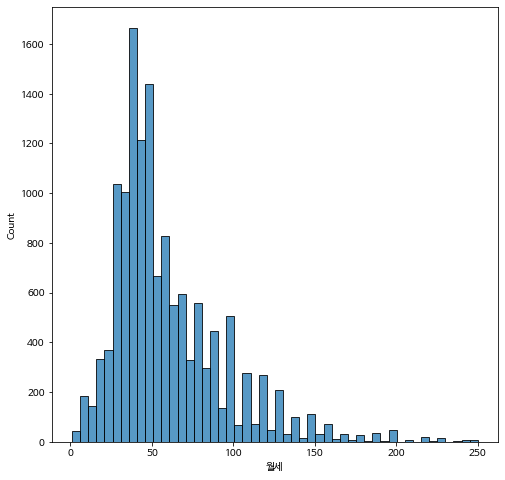

In [ ]:
plt.figure(figsize=(8,8))

sns.histplot(home_['월세'],bins=50)

In [ ]:
home_.to_csv('진짜 끝 월세데이터.csv')

## 모델링(예측)

In [ ]:
! pip install category_encoders

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

from category_encoders import TargetEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import RidgeCV, LogisticRegression

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import randint, uniform

In [4]:
df = pd.read_csv('/content/drive/MyDrive/cp1 1인가구/진짜 끝 월세데이터.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,자치구,보증금,월세,평수(m^2),건물층,매물층,분류,평수(평)
0,종로구,1000,60,39.67,2,2,고,12
1,종로구,500,35,30.28,2,반지하,반지하,9
2,종로구,500,40,19.83,3,2,고,6
3,종로구,500,40,23.50,3,1,저,7
4,종로구,500,38,29.75,2,반지하,반지하,9
...,...,...,...,...,...,...,...,...
13867,송파구,15000,50,37.43,5,2,저,11
13868,송파구,5000,70,62.81,4,3,고,19
13869,송파구,4000,37,26.45,5,4,고,8
13870,송파구,500,30,23.14,3,반지하,반지하,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13872 entries, 0 to 13871
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      13872 non-null  object 
 1   보증금      13872 non-null  int64  
 2   월세       13872 non-null  int64  
 3   평수(m^2)  13872 non-null  float64
 4   건물층      13872 non-null  int64  
 5   매물층      13872 non-null  object 
 6   분류       13872 non-null  object 
 7   평수(평)    13872 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 867.1+ KB


- 데이터 분리

In [5]:
from sklearn.model_selection import train_test_split
feature = ['자치구','보증금','분류','평수(평)']

x_train,x_test,y_train,y_test=train_test_split(df[feature],df['월세'],test_size=0.25,
                                               random_state=42) 
print(x_train.shape, y_test.shape)

(10404, 4) (3468,)


### 기준 모델

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


base = [y_train.mean()] * len(y_train)
mean_absolute_error(y_train, base)

25.99009040899154

In [7]:
np.sqrt(mean_squared_error(y_train,base))

34.62060582117575

### 회귀트리

#### 교차검증 평가지표

In [8]:
def get_model_cv_r2(model, x_train,y_train):
  r2_scores = cross_val_score(model, x_train, y_train, scoring="r2", cv = 5)
  r2_score = np.mean(r2_scores)
  print('##### ',model[2] , ' #####')
  print(' 5 교차 검증의 평균 R2 : {0:.3f} '.format(r2_score))

In [9]:
def get_model_cv_mse(model, x_train,y_train):
  neg_mse_scores = cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5)
  rmse_scores  = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)
  print('##### ',model[2] , ' #####')
  print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [10]:
def get_model_cv_mae(model, x_train,y_train):
  neg_mae_scores = cross_val_score(model, x_train, y_train, scoring="neg_mean_absolute_error", cv = 5)
  mae_scores  = -1 * neg_mae_scores
  avg_mae = np.mean(mae_scores)
  print('##### ',model[2] , ' #####')
  print(' 5 교차 검증의 평균 MAE : {0:.3f} '.format(avg_mae))

#### randomforestregessor

In [ ]:
pipe_random = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestRegressor(random_state=42,n_estimators=100)
)

pipe_random.fit(x_train,y_train)

In [ ]:
get_model_cv_mse(pipe_random,x_train,y_train)

#####  RandomForestRegressor(random_state=42)  #####
 5 교차 검증의 평균 RMSE : 20.727 


In [14]:
get_model_cv_r2(pipe_random,x_train,y_train)

#####  RandomForestRegressor(random_state=42)  #####
 5 교차 검증의 평균 R2 : 0.641 


#### randomcv(randomforest)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

pipe_random = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestRegressor(random_state=42,n_estimators=100)
)


param_dist = {
    'randomforestregressor__criterion':['mse','mae'], 
    'randomforestregressor__max_depth':[None,3,5,7], 
    'randomforestregressor__max_leaf_nodes':[None,3,4,5], 
    'randomforestregressor__min_samples_split':[2,3,4,5], 
    'randomforestregressor__min_samples_leaf':[1,2,3,4], 
    'randomforestregressor__max_features':[None,'sqrt','log2',3,4]
    }

rand_search = RandomizedSearchCV(pipe_random, param_distributions = param_dist, n_iter = 50, cv = 5, refit=True)
rand_search.fit(x_train, y_train)

In [ ]:
print('best parameters : ', rand_search.best_params_)
print('best score : ', round(rand_search.best_score_, 4))

best parameters :  {'randomforestregressor__min_samples_split': 4, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__max_features': 4, 'randomforestregressor__max_depth': None, 'randomforestregressor__criterion': 'mse'}
best score :  0.6447


----------
##### randomforestcv

In [ ]:
cv_random=make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestRegressor(min_samples_split=4,
                          min_samples_leaf=1,
                          max_features=4,
                          criterion='mse',
                          random_state=42)
)

cv_random.fit(x_train,y_train)

In [16]:
get_model_cv_r2(cv_random,x_train,y_train)
get_model_cv_mse(cv_random,x_train,y_train)
get_model_cv_mae(cv_random,x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was d

#####  RandomForestRegressor(criterion='mse', max_features=4, min_samples_split=4,
                      random_state=42)  #####
 5 교차 검증의 평균 R2 : 0.651 


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was d

#####  RandomForestRegressor(criterion='mse', max_features=4, min_samples_split=4,
                      random_state=42)  #####
 5 교차 검증의 평균 RMSE : 20.445 


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was d

#####  RandomForestRegressor(criterion='mse', max_features=4, min_samples_split=4,
                      random_state=42)  #####
 5 교차 검증의 평균 MAE : 13.525 


#### decisiontreeregressor

In [ ]:
pipe_decision = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    DecisionTreeRegressor(random_state=42)
)

pipe_decision.fit(x_train,y_train)

In [18]:
get_model_cv_r2(pipe_decision,x_train,y_train)
get_model_cv_mse(pipe_decision,x_train,y_train)
get_model_cv_mae(pipe_decision,x_train,y_train)

#####  DecisionTreeRegressor(random_state=42)  #####
 5 교차 검증의 평균 R2 : 0.471 
#####  DecisionTreeRegressor(random_state=42)  #####
 5 교차 검증의 평균 RMSE : 25.174 
#####  DecisionTreeRegressor(random_state=42)  #####
 5 교차 검증의 평균 MAE : 15.323 


#### GradientBoostingRegressor

In [ ]:
pipe_gradient = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    GradientBoostingRegressor(random_state=42)
)

pipe_gradient.fit(x_train,y_train)

In [20]:
get_model_cv_r2(pipe_gradient,x_train,y_train)
get_model_cv_mae(pipe_gradient,x_train,y_train)
get_model_cv_mse(pipe_gradient,x_train,y_train)

#####  GradientBoostingRegressor(random_state=42)  #####
 5 교차 검증의 평균 R2 : 0.636 
#####  GradientBoostingRegressor(random_state=42)  #####
 5 교차 검증의 평균 MAE : 14.389 
#####  GradientBoostingRegressor(random_state=42)  #####
 5 교차 검증의 평균 RMSE : 20.867 


#### XGBRegressor

In [ ]:
pipe_xgb = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    XGBRegressor(random_state=42 ,reg_lambda=1,gamma=0)
)

pipe_xgb.fit(x_train,y_train)

In [22]:
get_model_cv_mae(pipe_xgb,x_train,y_train)
get_model_cv_mse(pipe_xgb,x_train,y_train)
get_model_cv_r2(pipe_xgb,x_train,y_train)


[14:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor(random_state=42)  #####
 5 교차 검증의 평균 MAE : 14.387 
[14:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:21:56] WARNING: /workspace/src/objec

#### LGBMRegressor

In [ ]:
from lightgbm import LGBMRegressor

pipe_lgb=make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    LGBMRegressor(random_state=42,learning_rate=0.12,n_estimators=30)
)

pipe_lgb.fit(x_train,y_train)

In [24]:
get_model_cv_mae(pipe_lgb,x_train,y_train)
get_model_cv_mse(pipe_lgb,x_train,y_train)
get_model_cv_r2(pipe_lgb,x_train,y_train)

#####  LGBMRegressor(learning_rate=0.12, n_estimators=30, random_state=42)  #####
 5 교차 검증의 평균 MAE : 14.018 
#####  LGBMRegressor(learning_rate=0.12, n_estimators=30, random_state=42)  #####
 5 교차 검증의 평균 RMSE : 20.421 
#####  LGBMRegressor(learning_rate=0.12, n_estimators=30, random_state=42)  #####
 5 교차 검증의 평균 R2 : 0.652 


#### randomsearchvs(lgb)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

pipe_lgb=make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    LGBMRegressor(random_state=42)
)

param_dist = {
    'lgbmregressor__boosting_type':['gbdt','dart','rf'], 
    'lgbmregressor__max_depth':[None,2,4,5,6], 
    'lgbmregressor__num_leaves':[None,4,6,8], 
    'lgbmregressor__n_estimators':[None,30,50,100], 
    'lgbmregressor__min_child_samples':[1,3,5], 
    'lgbmregressor__learning_rate':[0.1,0.13,0.16]
    }

lgb_search = RandomizedSearchCV(pipe_lgb, param_distributions = param_dist, n_iter = 50, cv = 5, refit=True)
lgb_search.fit(x_train, y_train)

In [44]:
print(lgb_search.best_score_)
print(lgb_search.best_params_)

0.6671901576767826
{'lgbmregressor__num_leaves': None, 'lgbmregressor__n_estimators': 100, 'lgbmregressor__min_child_samples': 3, 'lgbmregressor__max_depth': 4, 'lgbmregressor__learning_rate': 0.16, 'lgbmregressor__boosting_type': 'gbdt'}


##### lgb-test

In [ ]:
cv_lgb=make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    LGBMRegressor(random_state=42,learning_rate=0.16,n_estimators=100,
                  num_leaves=None, min_child_samples=3,max_depth=4,
                  boosting_type='gbdt'
                  )
)

cv_lgb.fit(x_train,y_train)

In [48]:
get_model_cv_mse(cv_lgb,x_train,y_train)
get_model_cv_mae(cv_lgb,x_train,y_train)
get_model_cv_r2(cv_lgb,x_train,y_train)

#####  LGBMRegressor(learning_rate=0.16, max_depth=4, min_child_samples=3,
              num_leaves=None, random_state=42)  #####
 5 교차 검증의 평균 RMSE : 19.907 
#####  LGBMRegressor(learning_rate=0.16, max_depth=4, min_child_samples=3,
              num_leaves=None, random_state=42)  #####
 5 교차 검증의 평균 MAE : 13.625 
#####  LGBMRegressor(learning_rate=0.16, max_depth=4, min_child_samples=3,
              num_leaves=None, random_state=42)  #####
 5 교차 검증의 평균 R2 : 0.669 


- 테스트

In [49]:
test = cv_lgb.predict(x_test)
r2_score(y_test,test)

0.6782525989855432

In [50]:
np.sqrt(mean_squared_error(y_test,test))

20.58197698654989

In [51]:
mean_absolute_error(y_test,test)

14.035058319909117

### 특성중요도

In [ ]:
!pip3 install eli5

In [87]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), StandardScaler())),
    ('lgbm', LGBMRegressor(earning_rate=0.16, max_depth=4,
                               min_child_samples=3, num_leaves=None,
                               random_state=42)) 
])

pipe.fit(x_train,y_train)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['lgbm'], 
    scoring='r2', 
    n_iter=5, 
    random_state=42
)

X_test_transformed = pipe.named_steps['preprocessing'].fit_transform(x_test)

# 스코어를 다시 계산
permuter.fit(X_test_transformed, y_test);
feature_names = x_train.columns.tolist()
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식

Weight,Feature
0.8106 ± 0.0263,평수(평)
0.3282 ± 0.0141,보증금
0.0293 ± 0.0089,자치구
-0.0001 ± 0.0146,분류


- lightgbm에 특성중요도를 split, gain 방식이 있어 사용해봄
- 그런데 특성중요도는 0~1 사이만 존재하는 것이 아닌가?
  - 왜 나는 0이상의 값이 나오는지 궁금하다

<Figure size 720x720 with 0 Axes>

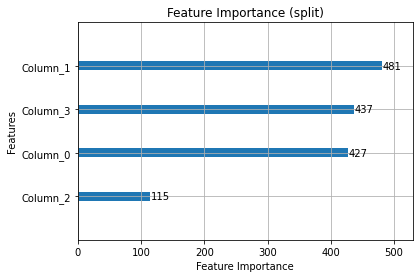

<Figure size 720x720 with 0 Axes>

In [71]:
import lightgbm as lgb

ax = lgb.plot_importance(cv_lgb[2], max_num_features=len(x_train.columns), importance_type='split')
ax.set(title=f'Feature Importance (split)',
	xlabel='Feature Importance',
	ylabel='Features')
plt.figure(figsize=(10,10))

## 최종 예측 모델 만들기
- train,test 합쳐 LGBM 모델에 넣어 다시 학습 진행

In [92]:
x= pd.concat([x_train,x_test])
y= pd.concat([y_train,y_test])

In [101]:
cv_lgb.fit(x,y)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['자치구', '분류'],
                                mapping=[{'col': '자치구', 'data_type': dtype('O'),
                                          'mapping': 강북구      1
동대문구     2
서대문구     3
광진구      4
송파구      5
양천구      6
금천구      7
은평구      8
동작구      9
구로구     10
성동구     11
강서구     12
노원구     13
영등포구    14
성북구     15
용산구     16
중구      17
중랑구     18
종로구     19
관악구     20
강남구     21
마포구     22
강동구     23
도봉구     24
서초구     25
NaN     -2
dtype: int64},
                                         {'col': '분류', 'data_type': dtype('O'),
                                          'mapping': 고      1
반지하    2
중      3
옥탑방    4
저      5
NaN   -2
dtype: int64}])),
                ('standardscaler', StandardScaler()),
                ('lgbmregressor',
                 LGBMRegressor(learning_rate=0.16, max_depth=4,
                               min_child_samples=3, num_leaves=None,
                               random_state=42))])

In [102]:
y_pred = cv_lgb.predict(x)
y_pred

array([33.14230672, 37.63627513, 50.95949976, ..., 38.8704319 ,
       46.60383551, 66.4195325 ])

In [103]:
r2_score(y,y_pred)

0.7087853898507752

In [104]:
mean_absolute_error(y,y_pred)

13.047241321455408

In [105]:
np.sqrt(mean_squared_error(y,y_pred))

18.911958422273663

- 실제 예측해보기

In [107]:
#자치구
cv_lgb.predict([{'자치구':15,'보증금':500,'분류':1,'평수(평)':8}])

array([45.55760199])

## 모델 예측 데이터 재정비(별 차이가 없어서 사용 안함)
- 자치구가 너무 많아 행정구역별로 나눠 다시 계산해봄

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cp1 1인가구/진짜 끝 월세데이터.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

In [12]:
a_city=['종로구', '중구', '용산구']
b_city=['성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구']
c_city=['은평구', '서대문구', '마포구']
d_city=['강서구', '양천구', '영등포구', '구로구', '금천구', '관악구', '동작구']
e_city=['강남구','강동구','서초구','송파구']
total=[]
for i in df['자치구']:
  if i in a_city:
    total.append('도심권')
  elif i in b_city:
    total.append('동북권')
  elif i in c_city :
    total.append('서북권')
  elif i in d_city:
    total.append('서남권')
  else:
    total.append('동남권')

In [13]:
df['행정구역']=total
df

,자치구,보증금,월세,평수(m^2),건물층,매물층,분류,평수(평),행정구역
0,종로구,1000,60,39.67,2,2,고,12,도심권
1,종로구,500,35,30.28,2,반지하,반지하,9,도심권
2,종로구,500,40,19.83,3,2,고,6,도심권
3,종로구,500,40,23.50,3,1,저,7,도심권
4,종로구,500,38,29.75,2,반지하,반지하,9,도심권
...,...,...,...,...,...,...,...,...,...
13867,송파구,15000,50,37.43,5,2,저,11,동남권
13868,송파구,5000,70,62.81,4,3,고,19,동남권
13869,송파구,4000,37,26.45,5,4,고,8,동남권
13870,송파구,500,30,23.14,3,반지하,반지하,7,동남권


In [14]:
from sklearn.model_selection import train_test_split
feature = ['행정구역','보증금','분류','평수(평)']

x_train,x_test,y_train,y_test=train_test_split(df[feature],df['월세'],test_size=0.25,
                                               random_state=42) 
print(x_train.shape, y_test.shape)

(10404, 4) (3468,)


#### randomforest

In [15]:
pipe_random2 = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

pipe_random2.fit(x_train,y_train)

get_model_cv_mse(pipe_random2,x_train,y_train)
get_model_cv_mae(pipe_random2,x_train,y_train)

#####  RandomForestRegressor(random_state=42)  #####
 5 교차 검증의 평균 RMSE : 20.527 
#####  RandomForestRegressor(random_state=42)  #####
 5 교차 검증의 평균 MAE : 13.416 


In [16]:
pipe_random2.score(x_train,y_train)

0.8217960622366687

#### decision

In [17]:
pipe_decision2 = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    DecisionTreeRegressor(random_state=42)
)

pipe_decision2.fit(x_train,y_train)

get_model_cv_mse(pipe_decision2,x_train,y_train)
get_model_cv_mae(pipe_decision2,x_train,y_train)

#####  DecisionTreeRegressor(random_state=42)  #####
 5 교차 검증의 평균 RMSE : 22.518 
#####  DecisionTreeRegressor(random_state=42)  #####
 5 교차 검증의 평균 MAE : 13.755 


In [18]:
pipe_decision2.score(x_train,y_train)

0.8343795771046709

#### gradientboosting

In [19]:
pipe_gradient2 = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    GradientBoostingRegressor(random_state=42)
)

pipe_gradient2.fit(x_train,y_train)

get_model_cv_mse(pipe_gradient2,x_train,y_train)
get_model_cv_mae(pipe_gradient2,x_train,y_train)

#####  GradientBoostingRegressor(random_state=42)  #####
 5 교차 검증의 평균 RMSE : 21.159 
#####  GradientBoostingRegressor(random_state=42)  #####
 5 교차 검증의 평균 MAE : 14.548 


In [20]:
pipe_gradient2.score(x_train,y_train)

0.6451993105025298

#### xgb

In [21]:
pipe_xgb2 = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    XGBRegressor(random_state=42 ,reg_lambda=1,gamma=0)
)

pipe_xgb2.fit(x_train,y_train)

get_model_cv_mse(pipe_xgb2,x_train,y_train)
get_model_cv_mae(pipe_xgb2,x_train,y_train)

[20:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
#####  XGBRegressor(random_state=42)  #####
 5 교차 검증의 평균 RMSE : 21.208 
[20:25:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:29] WARNING: /workspace/src/obje

In [22]:
pipe_xgb2.score(x_train,y_train)

0.6412841186026246

#### lgbm

In [23]:
from lightgbm import LGBMRegressor

pipe_lgb2=make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    LGBMRegressor(random_state=42,learning_rate=0.12,n_estimators=30)
)

pipe_lgb2.fit(x_train,y_train)

get_model_cv_mse(pipe_lgb2,x_train,y_train)
get_model_cv_mae(pipe_lgb2,x_train,y_train)

#####  LGBMRegressor(learning_rate=0.12, n_estimators=30, random_state=42)  #####
 5 교차 검증의 평균 RMSE : 20.842 
#####  LGBMRegressor(learning_rate=0.12, n_estimators=30, random_state=42)  #####
 5 교차 검증의 평균 MAE : 14.243 


In [24]:
pipe_lgb2.score(x_train,y_train)

0.6728123152920593